# STEP 1: Importing dataset directly from Kaggle into Colab

In [1]:
# Code to import dataset directly from Kaggle into Colab
# Need to have Kaggle user name and API token key (which may expire so new API token key might need to be generated)

!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yellowj4acket/real-estate-california")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedimtiazmir
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yellowj4acket/real-estate-california


100%|██████████| 11.4M/11.4M [00:00<00:00, 67.4MB/s]

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 1000) # to avoid wrapping of output

# load the dataset
data = pd.read_csv('/content/real-estate-california/RealEstate_California.csv')

data.head()



,Unnamed: 0,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [3]:
# info about dataset
data.shape

(35389, 39)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35389 entries, 0 to 35388
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          35389 non-null  int64  
 1   id                  35389 non-null  object 
 2   stateId             35389 non-null  int64  
 3   countyId            35389 non-null  int64  
 4   cityId              35389 non-null  int64  
 5   country             35389 non-null  object 
 6   datePostedString    35386 non-null  object 
 7   is_bankOwned        35389 non-null  int64  
 8   is_forAuction       35389 non-null  int64  
 9   event               35100 non-null  object 
 10  time                35100 non-null  float64
 11  price               35389 non-null  float64
 12  pricePerSquareFoot  35389 non-null  float64
 13  city                35389 non-null  object 
 14  state               35389 non-null  object 
 15  yearBuilt           35389 non-null  int64  
 16  stre

# Step 2: Identifying columns to be dropped
  * a. Columns which have data that have no relevance to price prediction e.g. Serial # (Unnamed: 0), id, time
  * b. Columns which have only one value in the dataset
  * c. Columns which only have limited value instances e.g. is_bankOwned
  * d. Columns which have duplicate information e.g. countyId (county), cityId (city), livingArea (livingAreaValue), buildingArea (overlapping values with livingAreaValue)

## Step 2a: Columns which have data that have no relevance to price prediction e.g. Serial # (Unnamed: 0), id, time

In [32]:
# Initialize an empty list to store column names to drop
columns_to_drop = []

# Dropping irrelevant columns
columns_to_drop.extend(['Unnamed: 0', 'id'])

# Dropping 'time' column since time of posting should not have any bearing on housing price
columns_to_drop.append('time')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time']




## Step2b: Identify columns with only one unique value

In [33]:
# Identify columns with only one unique value
one_unique_col = []

for column in data.columns:
    if data[column].nunique() == 1:
        one_unique_col.append((column, data[column].nunique()))
        columns_to_drop.append(column)

# Print columns with only one unique value and the count of unique values
print("Columns to drop (having only one unique value):")
for column, unique_count in one_unique_col:
    print(f"Column: {column}, Unique Values: {unique_count}")
print("\n")

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Columns to drop (having only one unique value):
Column: stateId, Unique Values: 1
Column: country, Unique Values: 1
Column: state, Unique Values: 1
Column: currency, Unique Values: 1



Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency']




## Step 2c. Columns which only have limited value instances e.g. is_bankOwned

In [34]:
# Identify columns with limited unique values and their counts
LIMITED_UNIQUE = 10             # constant to define how many unique values we may want to consider
limited_unique_col = []
limited_unique_col_counts = {} #dictionary to store column names and their unique values

for column in data.columns:
    if data[column].nunique() > 1 and data[column].nunique() < LIMITED_UNIQUE:
        limited_unique_col.append((column, data[column].nunique()))
        unique_values_counts = data[column].value_counts()
        limited_unique_col_counts[column] = unique_values_counts



print("="*50)

# Print columns with fewer than LIMITED_UNIQUE values and the count of unique values
print(f"\nColumns with fewer than {LIMITED_UNIQUE} unique values:")
for column, unique_count in limited_unique_col:
  print(f"Column: {column}, Unique Values: {unique_count}")

print("\n" + "="*50 + "\n\n")
# Print the unique values and their counts for columns with fewer than COUNT_INSTANCES values
COUNT_INSTANCES = 50
print(f"Unique values and their counts for columns with fewer than {COUNT_INSTANCES} unique values:\n")
for column, unique_values_counts in limited_unique_col_counts.items():
  if (unique_values_counts < COUNT_INSTANCES).any():
    print(f"Column: {column}")
    print(unique_values_counts)
    #print(unique_values_counts.sum())
    print("="*50)



Columns with fewer than 10 unique values:
Column: is_bankOwned, Unique Values: 2
Column: is_forAuction, Unique Values: 2
Column: event, Unique Values: 6
Column: hasBadGeocode, Unique Values: 2
Column: lotAreaUnits, Unique Values: 2
Column: parking, Unique Values: 2
Column: hasGarage, Unique Values: 2
Column: pool, Unique Values: 2
Column: spa, Unique Values: 2
Column: isNewConstruction, Unique Values: 2
Column: hasPetsAllowed, Unique Values: 2
Column: homeType, Unique Values: 6



Unique values and their counts for columns with fewer than 50 unique values:

Column: is_bankOwned
is_bankOwned
0    35386
1        3
Name: count, dtype: int64
Column: is_forAuction
is_forAuction
0    35363
1       26
Name: count, dtype: int64
Column: event
event
Listed for sale    24622
Price change        4893
Listing removed     4311
Sold                1268
Listed for rent        5
Pending sale           1
Name: count, dtype: int64
Column: hasBadGeocode
hasBadGeocode
0    35386
1        3
Name: count, dt

In [59]:
# Using output from above eliminating columns that have limited number of unique instances and will not help in building a predictive model
# these include is_bankOwned, is_forAuction, hasBadGeocode

columns_to_drop.extend(['is_bankOwned', 'is_forAuction', 'hasBadGeocode'])


# Visual assessment of 'lotAreaUnits' column indicates that use of Acres as unit is incorrect and sqft should be used
# With this assumption the 'lotAreaUnits' column can be added to the list of columns to be dropped since we will be considering area in sqft only
columns_to_drop.append('lotAreaUnits')

# since there is only one entry with homeType = APARTMENT, it should be replaced as CONDO
data.loc[data['homeType'] == 'APARTMENT', 'homeType'] = 'CONDO'

# confirm that there is no more entry with homeType as APARTMENT
print("Any entries with homeType as APARTMENT ", data[data['homeType'] == 'APARTMENT'].shape[0])

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Any entries with homeType as APARTMENT  0

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnit', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea', 'hasGarage', 'datePostedString', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnits']




# Step 2c: Identify duplicate columns

In [36]:
# Dropping duplicate columns since we have columns for 'county' and 'city'
columns_to_drop.extend(['countyId', 'cityId'])

# Dropping column 'zipcode' since relevant info is covered with 'city' albeit there might be multiple zipcodes within a 'city'
columns_to_drop.append('zipcode')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnit', 'countyId', 'cityId', 'zipcode']




### Analyze livingArea and livingAreaValue columns for duplication

In [37]:
# Check for differences between 'livingArea' and 'livingAreaValue'
difference = data['livingArea'] != data['livingAreaValue']

# Count the number of rows where the values are different
num_differences = difference.sum()
print(f"Number of rows with differences b/w livingArea and livingAreaValue columns: {num_differences}")

# Display the rows where the values are different
rows_with_differences = data[difference]
print(rows_with_differences[['livingArea', 'livingAreaValue']])
print("\n")
# Drop the 'livingArea' column
columns_to_drop.append('livingArea')  # since livingArea is missing an entry compared to livingAreaValue

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Number of rows with differences b/w livingArea and livingAreaValue columns: 1
       livingArea  livingAreaValue
34975         0.0       26210.0965



Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnit', 'countyId', 'cityId', 'zipcode', 'livingArea']




### Analyze livingAreaValue and buildingArea columns for duplication

In [38]:
# Check for overlapping values between livingAreaValue and buildingArea
# 1a. How many null values do we have in livingAreaValue and buildingArea?
null_living_area_value = data['livingAreaValue'].isnull().sum()
null_building_area = data['buildingArea'].isnull().sum()

print(f"Number of null values in 'livingAreaValue': {null_living_area_value}")
print(f"Number of null values in 'buildingArea': {null_building_area}")

# 1b. How many zero values do we have in livingAreaValue and buildingArea?
zero_living_area_value = (data['livingAreaValue'] == 0).sum()
zero_building_area = (data['buildingArea'] == 0).sum()

print(f"Number of zero values in 'livingAreaValue': {zero_living_area_value}")
print(f"Number of zero values in 'buildingArea': {zero_building_area}")


# 2. When livingAreaValue is zero, do we have a value in buildingArea (non-zero)?
living_area_zero_building_area_value = data[(data['livingAreaValue'] == 0) & (data['buildingArea'] != 0)].shape[0]

print(f"Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: {living_area_zero_building_area_value}")

# 3. When buildingArea is zero, do we have a value in livingAreaValue (non-zero)?
building_area_zero_living_area_value = data[(data['buildingArea'] == 0) & (data['livingAreaValue'] != 0)].shape[0]

print(f"Number of instances where 'buildingArea' is zero but 'livingAreaValue' has a non-zero value: {building_area_zero_living_area_value}")

# 4. When both livingAreaValue and buildingArea have non-zero values, are those values different?
# Check where both columns are non-zero, then check for value differences
both_values_present = data[(data['livingAreaValue'] != 0) & (data['buildingArea'] != 0)]
different_values = both_values_present[both_values_present['livingAreaValue'] != both_values_present['buildingArea']].shape[0]

print(f"Number of instances where both 'livingAreaValue' and 'buildingArea' have non-zero values but are different: {different_values}")


Number of null values in 'livingAreaValue': 0
Number of null values in 'buildingArea': 0
Number of zero values in 'livingAreaValue': 6764
Number of zero values in 'buildingArea': 29271
Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: 351
Number of instances where 'buildingArea' is zero but 'livingAreaValue' has a non-zero value: 22858
Number of instances where both 'livingAreaValue' and 'buildingArea' have non-zero values but are different: 0


In [39]:
# Based on the above copy values from 'buildingArea' to 'livingAreaValue' only where 'livingAreaValue' is zero
data.loc[data['livingAreaValue'] == 0, 'livingAreaValue'] = data['buildingArea']

# there should be no instances now where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value
living_area_zero_building_area_value = data[(data['livingAreaValue'] == 0) & (data['buildingArea'] != 0)].shape[0]

print(f"Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: {living_area_zero_building_area_value}")

# Drop the 'buildingArea' column since it no longer provides any value
columns_to_drop.append('buildingArea')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


Number of instances where 'livingAreaValue' is zero but 'buildingArea' has a non-zero value: 0

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnit', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea']




homeType
CONDO              51
LOT              5562
MULTI_FAMILY      535
SINGLE_FAMILY     265
dtype: int64


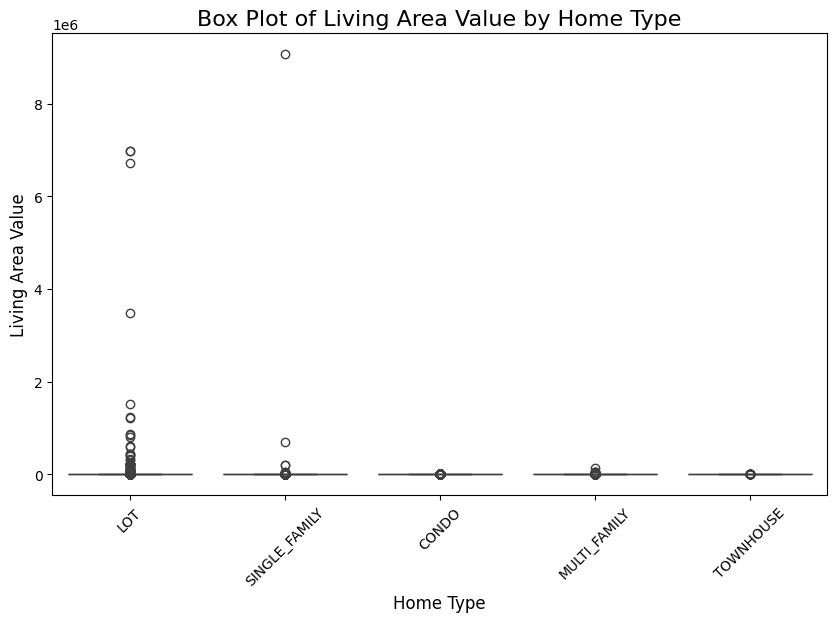

                 count         mean            std    min     25%     50%      75%        max
homeType                                                                                     
CONDO           3496.0  1213.083238     510.527634    0.0   900.0  1125.0  1440.00     6555.0
LOT             5850.0  6635.675214  167335.833651    0.0     0.0     0.0     0.00  6969600.0
MULTI_FAMILY    2446.0  2992.667212    4665.752471    0.0  1040.5  2152.0  3642.75   127930.0
SINGLE_FAMILY  22409.0  2627.291807   60743.120900    0.0  1350.0  1835.0  2547.00  9061351.0
TOWNHOUSE       1188.0  1554.943603     465.860795  336.0  1244.5  1502.0  1760.75     5377.0


In [40]:
# find instances where livingAreaValue is zero categorized by homeType
# Step 1: Filter rows where 'livingAreaValue' is zero
zero_living_area = data[data['livingAreaValue'] == 0]

# Step 2: Group by 'homeType' and count the occurrences
zero_living_area_by_homeType = zero_living_area.groupby('homeType').size()

# Print the result
print(zero_living_area_by_homeType)


# Create a box plot to visually inspect outliers in 'livingAreaValue'

# Step 1: Set up the figure and axes for the plot
plt.figure(figsize=(10, 6))

# Step 2: Create the box plot using seaborn
sns.boxplot(x='homeType', y='livingAreaValue', data=data)

# Step 3: Add labels and title
plt.title('Box Plot of Living Area Value by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Living Area Value', fontsize=12)

# Step 4: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 5: Show the plot
plt.show()

# Step 1: Group by 'homeType' and describe 'livingAreaValue'
living_area_stats_by_homeType = data.groupby('homeType')['livingAreaValue'].describe()


# Step 2: Display the result
print(living_area_stats_by_homeType)

# Step 1: Impute missing values in 'livingAreaValue' using the mean within each 'homeType' group
# data['livingAreaValue'] = data.groupby('homeType')['livingAreaValue'].transform(lambda x: x.fillna(x.mean()))

# Verify the imputation by checking if there are any missing values left
# print(data['livingAreaValue'].isnull().sum())  # Should return 0 if all missing values were imputed


In [41]:
# finding the outliers by defining the following variables
NUM_SMALLEST = 20
NUM_LARGEST = 20

# Step 1: Filter out rows where 'livingAreaValue' is zero
non_zero_living_area = data[data['livingAreaValue'] > 0]

# Step 2: Sort the data by 'homeType' and 'livingAreaValue'
sorted_data = non_zero_living_area.sort_values(by=['homeType', 'livingAreaValue'])

# Step 3: Group by 'homeType'
grouped_data = sorted_data.groupby('homeType')

# Step 4: Iterate over each homeType and print the smallest and largest values
for home_type, group in grouped_data:
    # Find the  NUM_SMALLEST non-zero values
    num_smallest = group['livingAreaValue'].head(NUM_SMALLEST).tolist()

    # Find the NUM_LARGEST values
    num_largest = group['livingAreaValue'].tail(NUM_LARGEST).tolist()

    # Print the results for each homeType
    print(f"\nHome Type: {home_type}")
    print(f"{NUM_SMALLEST} Smallest Non-Zero Values: {num_smallest}")
    print(f"{NUM_LARGEST} Largest Values: {num_largest}")


Home Type: CONDO
20 Smallest Non-Zero Values: [218.0, 369.0, 369.0, 378.0, 385.0, 389.0, 394.0, 414.0, 414.0, 424.0, 424.0, 429.0, 430.0, 441.0, 444.0, 446.0, 446.0, 450.0, 468.0, 471.0]
20 Largest Values: [3085.0, 3179.0, 3179.0, 3222.0, 3231.0, 3252.0, 3320.0, 3376.0, 3376.0, 3450.0, 3474.0, 3535.0, 3854.0, 3854.0, 4216.0, 4715.0, 4715.0, 5867.0, 6092.0, 6555.0]

Home Type: LOT
20 Smallest Non-Zero Values: [1.0, 1.0, 1.0, 1.0, 3.0, 120.0, 170.0, 182.0, 272.0, 288.0, 288.0, 300.0, 320.0, 323.0, 392.0, 392.0, 400.0, 400.0, 490.0, 526.0]
20 Largest Values: [222156.0, 232610.0, 311890.0, 331056.0, 402059.0, 420354.0, 435600.0, 435600.0, 588060.0, 609840.0, 795841.0, 852034.0, 880783.0, 1212275.0, 1237104.0, 1524600.0, 3484800.0, 6708240.0, 6969600.0, 6969600.0]

Home Type: MULTI_FAMILY
20 Smallest Non-Zero Values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 6.0, 8.0, 200.0, 250.0]
20 Largest Values: [22828.0, 22828.0, 23256.0, 23450.0, 23763.0, 24640

# QUESTION: How to fill in the zero values for livingAreaValue column?

### Analyze relationship b/w parking, hasGarage and garageSpaces column for duplication

In [43]:
# Compare the 'parking' and 'hasGarage' columns to find differences
differences = data[data['parking'] != data['hasGarage']]

# Print the number of rows where differences exist
num_differences = differences.shape[0]
print(f"Number of rows where 'parking' and 'hasGarage' differ: {num_differences}")

# Print the rows where 'parking' and 'hasGarage' are different
print(differences[['parking', 'hasGarage']])

# Filter rows where 'hasGarage' is non-zero (True), 'garageSpaces' is non-zero, but 'parking' is zero
rows_with_parking_issues = data[(data['hasGarage'] != 0) & (data['garageSpaces'] > 0) & (data['parking'] == 0)]

# Print the number of rows that meet the condition
num_issues = rows_with_parking_issues.shape[0]
print(f"Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: {num_issues}")

# Display the rows with the parking issue
print(rows_with_parking_issues[['hasGarage', 'garageSpaces', 'parking']])

# Update rows where 'parking' is 0, 'hasGarage' is 1 (True), and 'garageSpaces' is non-zero
data.loc[(data['parking'] == 0) & ((data['hasGarage'] == 1) | (data['garageSpaces'] > 0)), 'parking'] = 1



Number of rows where 'parking' and 'hasGarage' differ: 6132
      parking  hasGarage
23          1          0
27          1          0
45          1          0
56          1          0
64          1          0
...       ...        ...
35339       1          0
35341       1          0
35342       1          0
35354       1          0
35387       1          0

[6132 rows x 2 columns]
Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: 0
Empty DataFrame
Columns: [hasGarage, garageSpaces, parking]
Index: []
Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: 0


In [45]:
# Verify if there are any rows where 'hasGarage' is non-zero (True), 'garageSpaces' is non-zero, but 'parking' is zero
rows_with_parking_issues = data[(data['hasGarage'] != 0) & (data['garageSpaces'] > 0) & (data['parking'] == 0)]

# Print the number of rows that meet the condition
num_issues = rows_with_parking_issues.shape[0]
print(f"Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: {num_issues}")

Number of rows where 'hasGarage' and 'garageSpaces' are non-zero but 'parking' is zero: 0


### Analyze relationship b/w hasGarage and garageSpaces for duplication

In [46]:
# Identify rows where 'hasGarage' is True (or non-zero) but 'garageSpaces' is zero or null
garage_issues = data[(data['hasGarage'] != 0) & ((data['garageSpaces'] == 0) | (data['garageSpaces'].isnull()))]

# Print the number of instances where 'hasGarage' is non-zero but 'garageSpaces' is zero or null
num_issues = garage_issues.shape[0]
print(f"Number of rows where 'hasGarage' is non-zero but 'garageSpaces' is zero or null: {num_issues}")

# Print the problematic rows
print(garage_issues[['hasGarage', 'garageSpaces']])

Number of rows where 'hasGarage' is non-zero but 'garageSpaces' is zero or null: 1052
       hasGarage  garageSpaces
253            1           0.0
318            1           0.0
454            1           0.0
595            1           0.0
677            1           0.0
...          ...           ...
35365          1           0.0
35369          1           0.0
35371          1           0.0
35377          1           0.0
35382          1           0.0

[1052 rows x 2 columns]


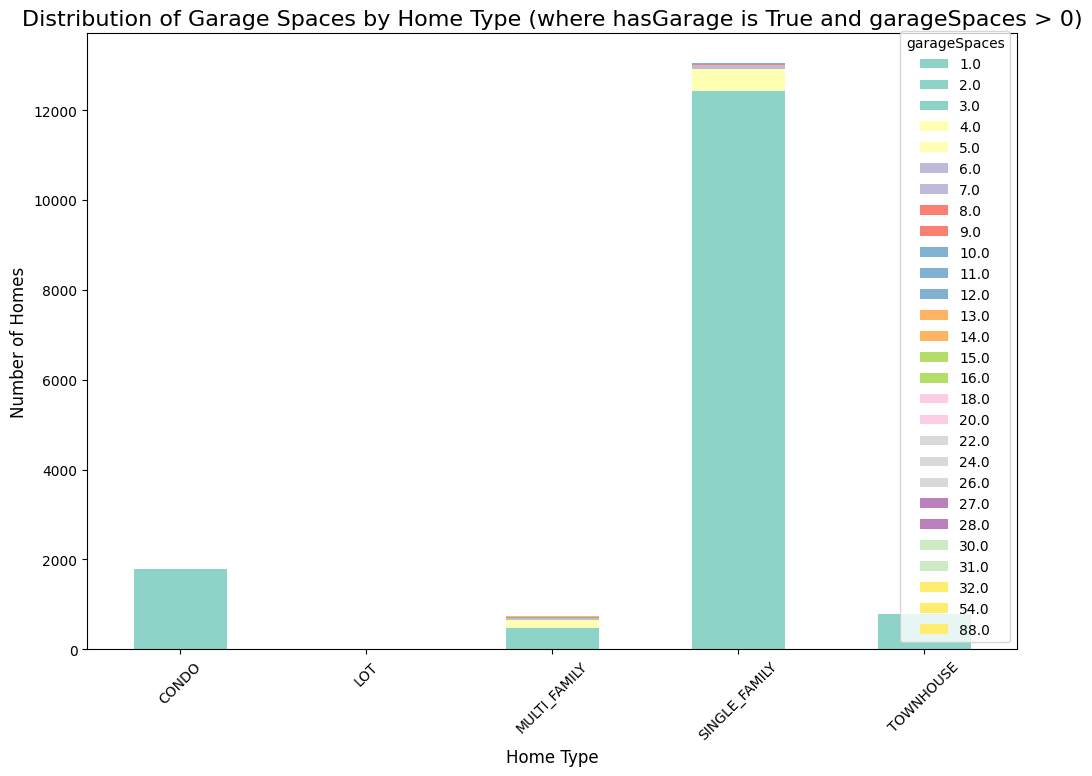

In [47]:
import matplotlib.pyplot as plt

# Compare the instances where hasGarage is true and garageSpaces is non zero and create bar chart of these values against homeType.
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is non-zero
filtered_data = data[(data['hasGarage'] == True) & (data['garageSpaces'] > 0)]

# Step 2: Group by 'homeType' and 'garageSpaces', and count occurrences
garage_spaces_counts = filtered_data.groupby(['homeType', 'garageSpaces']).size().unstack(fill_value=0)

# Step 3: Create a stacked bar chart to show the distribution of 'garageSpaces' per 'homeType'
garage_spaces_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')

# Add chart labels and title
plt.title('Distribution of Garage Spaces by Home Type (where hasGarage is True and garageSpaces > 0)', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


Number of instances when 'hasGarage' is True and 'garageSpaces' is non-zero' =  16380
Number of instances when 'hasGarage' is True and 'garageSpaces' is 1, 2, 3 or 4' =  16023


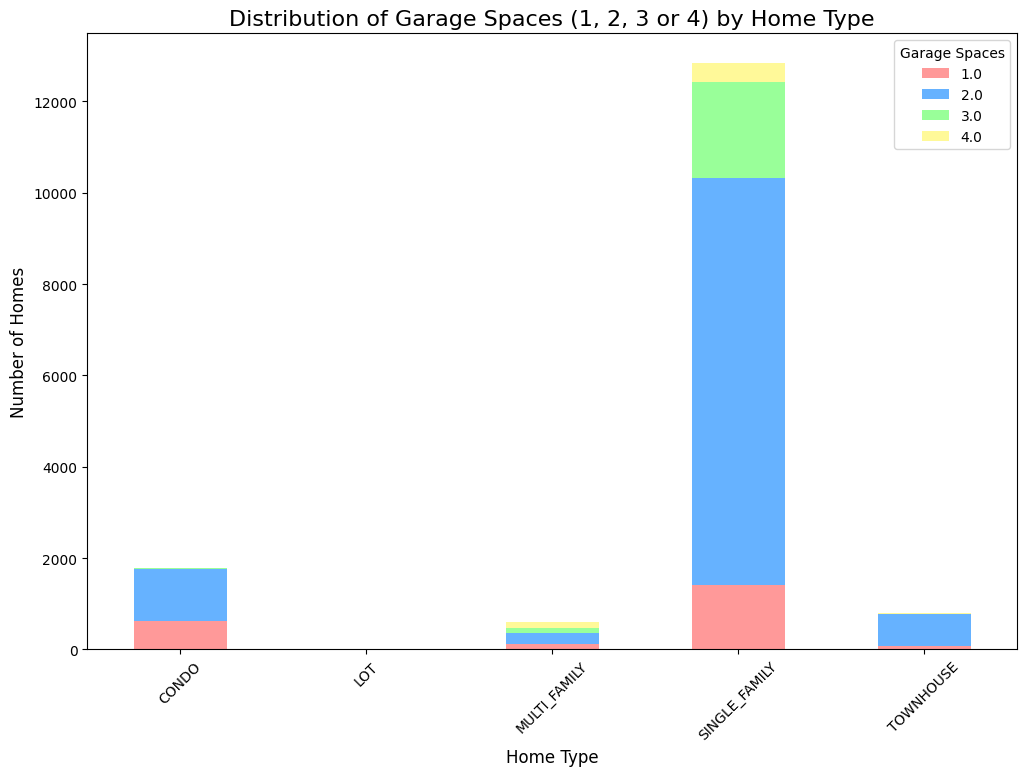

Total instances where garageSpaces are 1, 2, 3 or 4: 16023


In [49]:
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is non-zero
filtered_data = data[(data['hasGarage'] == True) & (data['garageSpaces'] > 0)]
print("Number of instances when 'hasGarage' is True and 'garageSpaces' is non-zero' = ", filtered_data.shape[0])

# Step 2: Group by 'homeType' and 'garageSpaces' (limit the values to 1, 2, 3, 4 for this case)
garage_spaces_filtered = filtered_data[filtered_data['garageSpaces'].isin([1, 2, 3, 4])]
print("Number of instances when 'hasGarage' is True and 'garageSpaces' is 1, 2, 3 or 4' = ", garage_spaces_filtered.shape[0])

# Step 3: Group by 'homeType' and 'garageSpaces', and count occurrences
garage_spaces_counts = garage_spaces_filtered.groupby(['homeType', 'garageSpaces']).size().unstack(fill_value=0)

# Step 4: Create a stacked bar chart with distinct colors for garageSpaces values
garage_spaces_counts[[1, 2, 3, 4]].plot(kind='bar', stacked=True, figsize=(12, 8),
                                     color=['#FF9999', '#66B2FF', '#99FF99', '#FFF999'])

# Add chart labels and title
plt.title('Distribution of Garage Spaces (1, 2, 3 or 4) by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Add a legend to specify garage spaces
plt.legend(title='Garage Spaces', loc='upper right')

# Show the plot
plt.xticks(rotation=45)
plt.show()

# Step 1: Filter only the relevant columns (garageSpaces 1, 2, 3 or 4)
garage_spaces_filtered_counts = garage_spaces_counts[[1, 2, 3, 4]]

# Step 2: Sum the values for garageSpaces 1, 2, 3 and 4 across all home types
total_instances = garage_spaces_filtered_counts.sum().sum()

# Print the total number of instances where garageSpaces are 1, 2, 3 or 4
print(f"Total instances where garageSpaces are 1, 2, 3 or 4: {total_instances}")


Average garage spaces by homeType homeType
CONDO            1.672991
LOT              4.000000
MULTI_FAMILY     3.796247
SINGLE_FAMILY    2.190440
TOWNHOUSE        1.933926
Name: garageSpaces, dtype: float64
Rounded average garage spaces by homeType to the nearest 0.5  homeType
CONDO            1.5
LOT              4.0
MULTI_FAMILY     4.0
SINGLE_FAMILY    2.0
TOWNHOUSE        2.0
Name: garageSpaces, dtype: float64


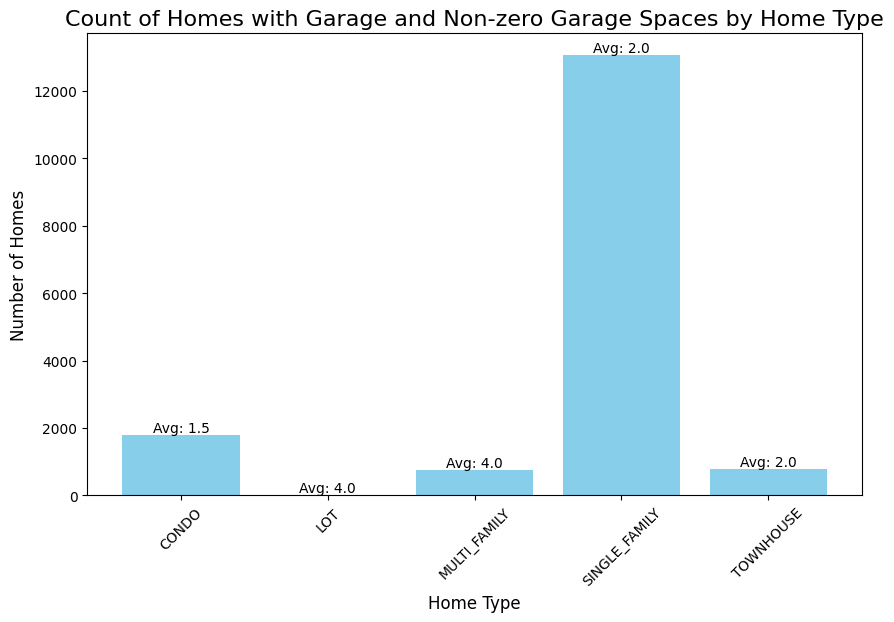

In [50]:
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is non-zero
filtered_data = data[(data['hasGarage'] == True) & (data['garageSpaces'] > 0)]

# Step 2: Group by 'homeType' and calculate the count and the mean garage spaces
homeType_counts = filtered_data.groupby('homeType').size()
homeType_avg_spaces = filtered_data.groupby('homeType')['garageSpaces'].mean()
print("Average garage spaces by homeType", homeType_avg_spaces)

# rounding the average garage spaces by homeType to the nearest 0.5
homeType_avg_spaces = round(homeType_avg_spaces*2)/2
print("Rounded average garage spaces by homeType to the nearest 0.5 ", homeType_avg_spaces)

# Step 3: Create the bar chart with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(homeType_counts.index, homeType_counts.values, color='skyblue')

# Annotate the bars with the average garage spaces
for bar, avg_space in zip(bars, homeType_avg_spaces):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'Avg: {avg_space:.1f}', ha='center', va='bottom')

# Add chart labels and title
plt.title('Count of Homes with Garage and Non-zero Garage Spaces by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

Number of instances when 'hasGarage' is True and 'garageSpaces' is zero' =  1052
homeType_zero_garage_counts =  homeType
CONDO            309
LOT                3
MULTI_FAMILY     162
SINGLE_FAMILY    549
TOWNHOUSE         29
dtype: int64


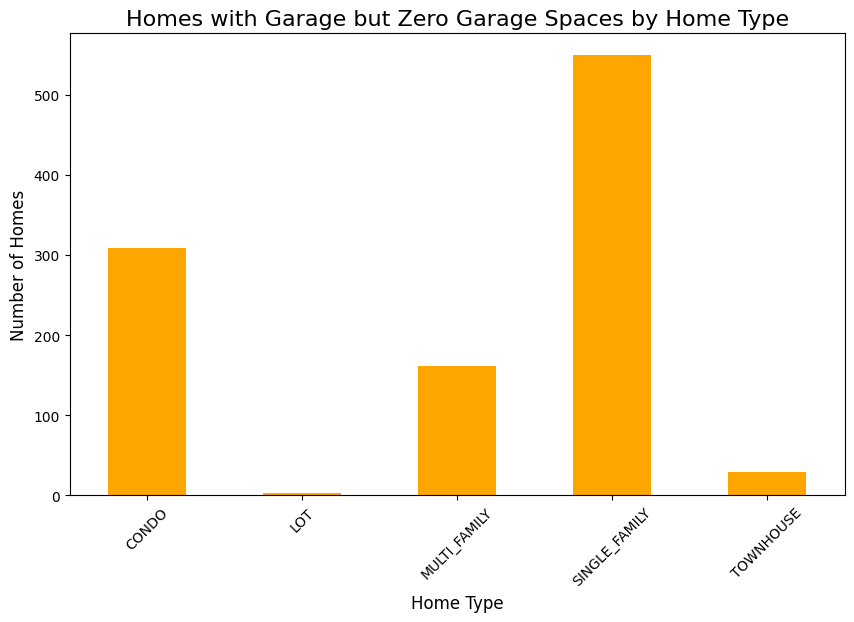

In [51]:
# Step 1: Filter where 'hasGarage' is True and 'garageSpaces' is zero
filtered_data_zero_garage = data[(data['hasGarage'] == True) & (data['garageSpaces'] == 0)]
print("Number of instances when 'hasGarage' is True and 'garageSpaces' is zero' = ", filtered_data_zero_garage.shape[0])

# Step 2: Group by 'homeType' and count the occurrences
homeType_zero_garage_counts = filtered_data_zero_garage.groupby('homeType').size()
print("homeType_zero_garage_counts = ", homeType_zero_garage_counts)

# Step 3: Create a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
homeType_zero_garage_counts.plot(kind='bar', color='orange')

# Add chart labels and title
plt.title('Homes with Garage but Zero Garage Spaces by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=12)
plt.ylabel('Number of Homes', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [52]:
# Step 1: Calculate the mean garageSpaces for each homeType where garageSpaces > 0, rounded to the nearest 0.5
homeType_avg_spaces = data[data['garageSpaces'] > 0].groupby('homeType')['garageSpaces'].mean()

# Step 2: Round the mean values to the nearest 0.5
homeType_avg_spaces = homeType_avg_spaces.apply(lambda x: round(x * 2) / 2)
print("homeType_avg_spaces = ", homeType_avg_spaces)

# Step 3: Update garageSpaces to the rounded mean value where hasGarage is 1 and garageSpaces is 0
data.loc[(data['hasGarage'] == 1) & (data['garageSpaces'] == 0), 'garageSpaces'] = data['homeType'].map(homeType_avg_spaces)

# Verify the update by printing the affected rows
updated_rows = data[(data['hasGarage'] == 1) & (data['garageSpaces'] != 0)]
print(updated_rows[['homeType', 'hasGarage', 'garageSpaces']].head())

homeType_avg_spaces =  homeType
CONDO            1.5
LOT              4.0
MULTI_FAMILY     4.0
SINGLE_FAMILY    2.0
TOWNHOUSE        2.0
Name: garageSpaces, dtype: float64
        homeType  hasGarage  garageSpaces
1  SINGLE_FAMILY          1           2.0
2  SINGLE_FAMILY          1           2.0
3  SINGLE_FAMILY          1           1.0
5  SINGLE_FAMILY          1           2.0
6  SINGLE_FAMILY          1           2.0


In [53]:
# check if there are any rows where hasGarage is 1 but garageSpaces is zero
rows_with_zero_garage_spaces = data[(data['hasGarage'] == 1) & (data['garageSpaces'] == 0)]

# Print the number of rows with zero
num_rows_with_zero_garage_spaces = rows_with_zero_garage_spaces.shape[0]
print(f"Number of rows where 'hasGarage' is True and 'garageSpaces' is zero: {num_rows_with_zero_garage_spaces}")

# check if there are any rows where garageSpaces is non-zero but hasGarage is 0
rows_with_non_zero_garage_spaces = data[(data['hasGarage'] == 0) & (data['garageSpaces'] > 0)]

# Print the number of rows with non-zero garageSpaces and hasGarage is 0
num_rows_with_non_zero_garage_spaces = rows_with_non_zero_garage_spaces.shape[0]
print(f"Number of rows where 'hasGarage' is False and 'garageSpaces' is non-zero: {num_rows_with_non_zero_garage_spaces}")


# now that garageSpaces column has been fixed (imputed) we can now drop hasGarage column and we can ignore the cases where hasGarage is False even when garageSpaces is non-zero
columns_to_drop.append('hasGarage')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")

Number of rows where 'hasGarage' is True and 'garageSpaces' is zero: 0
Number of rows where 'hasGarage' is False and 'garageSpaces' is non-zero: 101

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnit', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea', 'hasGarage']




# Identify columns to be morphed

This would be considered as part of feature engineering:

1. Morphing datePostedString column to Seasons for the following reasons - based on general market trends:
  * Winter (December - February): Typically slower period for real estate, as fewer people are buying during holiday and colder months. This would imply potential for slightly lower prices due to lower demand.
  * Spring (March - May): Busiest season for real estate, as many families look to buy before summer and weather is pleasant. This would imply high demand, and higher prices.
  * Summer (June - August): Continued high demand as families try to close on homes before school year starts leading to competitive market, higher prices.
  * Fall (September - November): Slowdown in activity as families settle into school year and holiday season approaches. This would imply fewer listings, potential for deals.

In [54]:
# Check for null values in the 'datePosted' column
null_values_count = data['datePostedString'].isnull().sum()

# Print the number of null values
print(f"Number of null values in 'datePosted': {null_values_count}")

Number of null values in 'datePosted': 3


In [55]:
# Drop rows with null values in 'datePostedString' and modify the original DataFrame in place
data.dropna(subset=['datePostedString'], inplace=True)

# Check if any null values remain in 'datePostedString'
print(data['datePostedString'].isnull().sum())


0


In [56]:
# Convert 'datePostedString' to datetime if it's not already
data['datePostedString'] = pd.to_datetime(data['datePostedString'])

# Define a function to categorize seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a 'season' column
data['season'] = data['datePostedString'].dt.month.apply(get_season)

# Now you can use this 'season' feature in your prediction model
print(data[['datePostedString', 'season']].head())

# Group by the 'season' column and count the number of instances for each season
season_counts = data['season'].value_counts()

# Print the count of listings for each season
print(season_counts)

# print total entries in season_counts
print(f"\nTotal entries in season_counts: {len(season_counts)}")

# print sum of values in season_counts
print(f"\nSum of values in season_counts: {season_counts.sum()}")

# Add datePostedString to list of columns to be dropped
columns_to_drop.append('datePostedString')

print("\nRunnnig List of columns to drop:")
print(columns_to_drop)
print("\n")


  datePostedString  season
0       2021-01-13  Winter
1       2021-07-12  Summer
2       2021-07-08  Summer
3       2021-07-07  Summer
4       2021-07-07  Summer
season
Summer    28409
Spring     5894
Winter      741
Fall        342
Name: count, dtype: int64

Total entries in season_counts: 4

Sum of values in season_counts: 35386

Runnnig List of columns to drop:
['Unnamed: 0', 'id', 'time', 'stateId', 'country', 'state', 'currency', 'is_bankOwned', 'is_forAuction', 'hasBadGeocode', 'lotAreaUnit', 'countyId', 'cityId', 'zipcode', 'livingArea', 'buildingArea', 'hasGarage', 'datePostedString']




# Dropping columns identified thus far as candidates for dropping

In [60]:
# Drop those columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

# Show the cleaned dataset with the columns dropped
print("Dataset after dropping columns based an analysis:")
print(data_cleaned.head())

KeyError: "['lotAreaUnit'] not found in axis"

# Cleaning Rows

After dropping columns, next step is to clean the rows.

This would include the following:
* Identify duplicate rows using duplicated street addresses
* Identify rows whose values need to be updated e.g.
  1. Column "homeType" has one row which has value "APARTMENT" --> this should be changed to "MULTI_FAMILY"
  2. Column event has 5 rows which has value "Listed for rent"
* Identify rows where price (intended model output) is missing --> these rows should be deleted
*





In [ ]:
# Identify duplicate entries in the 'streetAddress' column
duplicates = data_cleaned['streetAddress'].duplicated(keep=False)  # keep=False shows all duplicates

# Print the index and streetAddress for rows with duplicates
duplicate_entries = data_cleaned[duplicates][['streetAddress']]

# Count the number of duplicate entries in 'streetAddress'
num_duplicates = data_cleaned['streetAddress'].duplicated().sum()
print(f"Number of duplicate street addresses: {num_duplicates}")

# Print the index and streetAddress
print(duplicate_entries)

# Remove duplicate street addresses and keep only the first occurrence
data_cleaned = data_cleaned.drop_duplicates(subset='streetAddress', keep='first')

data_cleaned.info()

Number of duplicate street addresses: 0
Empty DataFrame
Columns: [streetAddress]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 30906 entries, 0 to 35388
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datePostedString    30904 non-null  object 
 1   event               30906 non-null  object 
 2   time                30906 non-null  float64
 3   price               30906 non-null  float64
 4   pricePerSquareFoot  30906 non-null  float64
 5   city                30906 non-null  object 
 6   yearBuilt           30906 non-null  int64  
 7   streetAddress       30905 non-null  object 
 8   zipcode             30884 non-null  float64
 9   longitude           30906 non-null  float64
 10  latitude            30906 non-null  float64
 11  description         30669 non-null  object 
 12  livingArea          30906 non-null  float64
 13  livingAreaValue     30906 non-null  float64
 14  lotAreaUnits    

In [ ]:
# Identify columns with missing values

# Identify columns with missing values
missing_values = data_cleaned.isnull().sum()

# Filter the columns that have missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print the columns with missing values and the count of missing values
print("Columns with missing values and counts of missing values:")
print(columns_with_missing_values)

Columns with missing values and counts of missing values:
datePostedString      3
event               289
time                289
streetAddress         1
zipcode              25
description         279
dtype: int64


In [ ]:
# Identify instances of rows which have no price listed

# First ensure that all values in the 'price' column are converted to numeric
data_cleaned['price'] = pd.to_numeric(data['price'], errors='coerce')

# Identify count of rows with missing values or ZERO values in the 'price' column
no_price = data_cleaned[data_cleaned['price'].isna() | (data_cleaned['price'] == 0) | (data_cleaned['price'] < 100)]

# Print count of no_price
print("Count of rows with no price listed:")
print(len(no_price))  # Print the count of rows with no price listed



Count of rows with no price listed:
320


In [ ]:
# Drop rows with zero price
data_cleaned.drop(data_cleaned[data_cleaned['price'] == 0].index, inplace=True)
data_cleaned.drop(data_cleaned[data_cleaned['price'] == 1].index, inplace=True)


In [ ]:
# Get the describe output as a DataFrame
desc_stats = data_cleaned.describe()

# Apply formatting to the interested columns
desc_stats['price'] = desc_stats['price'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['livingArea'] = desc_stats['livingArea'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['bedrooms'] = desc_stats['bedrooms'].apply(lambda x: '{:.0f}'.format(x))
desc_stats['bathrooms'] = desc_stats['bathrooms'].apply(lambda x: '{:.0f}'.format(x))


selected_columns = desc_stats[['price', 'livingArea', 'bedrooms', 'bathrooms']]
# Print the formatted describe output
print(selected_columns)

          price livingArea bedrooms bathrooms
count     35069      35069    35069     35069
mean    1198728       3101        3         2
std     2574038      83854        2         2
min         650          0        0         0
25%      409000        908        2         1
50%      699000       1510        3         2
75%     1200000       2243        4         3
max    95000000    9061351       99        58


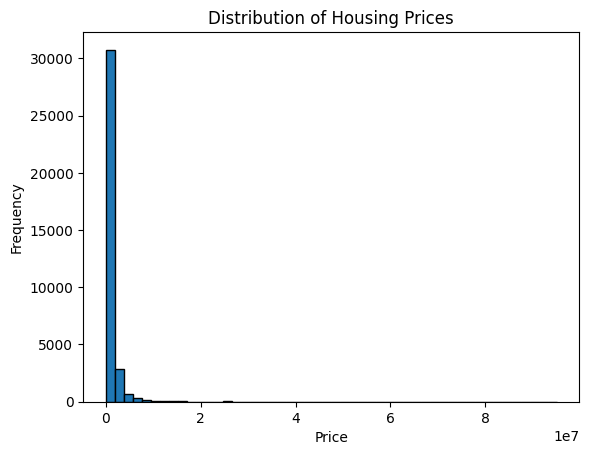

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of housing prices
plt.hist(data_cleaned['price'], bins=50, edgecolor='black')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


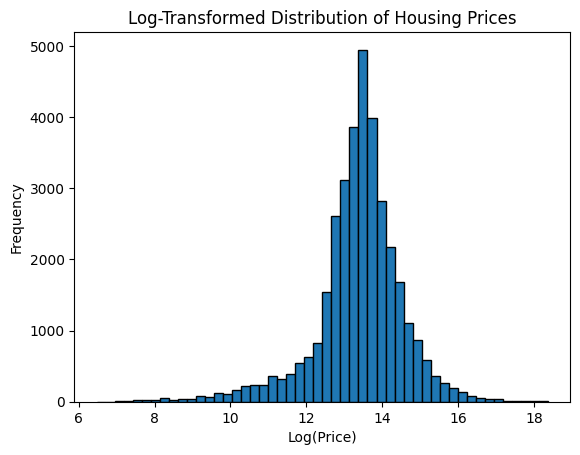

In [ ]:
import numpy as np

# Apply log transformation to prices to reduce skewness
log_prices = np.log1p(data_cleaned['price'])  # np.log1p ensures log(0) works properly

# Plotting the log-transformed distribution of housing prices
plt.hist(log_prices, bins=50, edgecolor='black')
plt.title('Log-Transformed Distribution of Housing Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

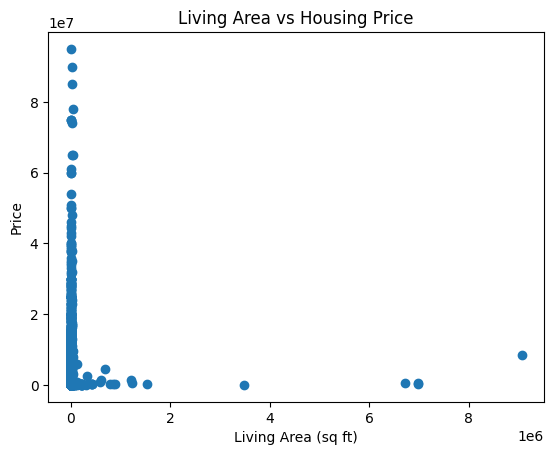

In [ ]:
# Scatter plot for living area vs price
plt.scatter(data_cleaned['livingArea'], data_cleaned['price'])
plt.title('Living Area vs Housing Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')
plt.show()

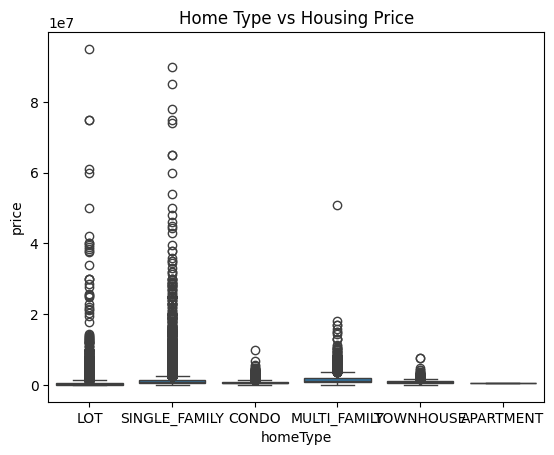

In [ ]:
# Box plot for home type vs price
sns.boxplot(x='homeType', y='price', data=data_cleaned)
plt.title('Home Type vs Housing Price')
plt.show()

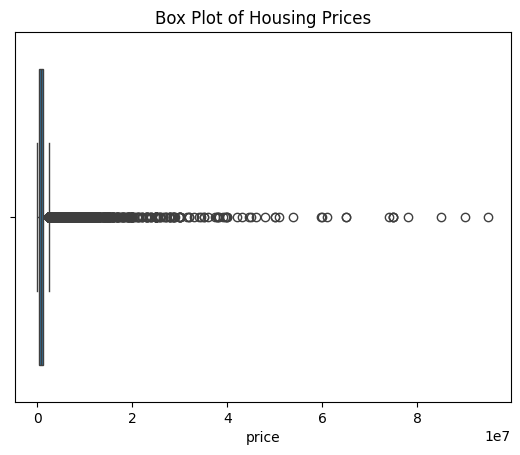

In [ ]:
# box plot of housing prices

import seaborn as sns
sns.boxplot(x=data_cleaned['price'])
plt.title('Box Plot of Housing Prices')
plt.show()